In [1]:
from server_config import NODES
from RendezvousHashing import HRW
from ConsistentHashing import CH
from sample_data import USERS
from pickle_hash import serialize_PUT
import string
import random

In [2]:
def randomString(stringLength=8):
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(stringLength))

In [3]:
#generate test set
testset = []
for i in range(1000):
    #generate random object
    name = randomString()
    user = {'name':name,"email":name + "@email.com","age":random.randint(0,100)}
    data_bytes, key = serialize_PUT(user)
    # first find out the nodes by the key, then send the data by that client
    testset.append(key)

In [4]:
def test(R,keys):
    # create a ring with provided Nodes sockets
    ring = R
    # calculate distribution
    dist = [0] * len(NODES)
    # get the node socket of provided md5 hash value
    for key in keys:
        node = ring.get_node(key)[0]['port']%len(NODES)
        dist[node] += 1
    return(dist)
CH_ring = CH(nodes=NODES)
HRW_ring = HRW(nodes=NODES)
HRW_dist = test(HRW_ring,testset)
CH_dist = test(CH_ring,testset)

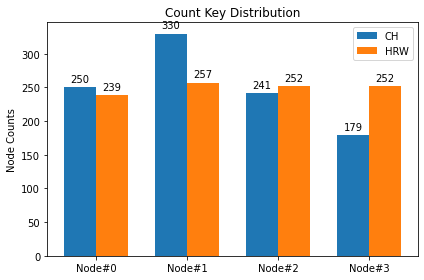

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = [f'Node#{i}' for i in range(4)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, CH_dist, width, label='CH')
rects2 = ax.bar(x + width/2, HRW_dist, width, label='HRW')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Node Counts')
ax.set_title('Count Key Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
